In [1]:
import seaborn as sns
import pandas as pd
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from ast import literal_eval

tqdm.pandas()


# df = pd.read_csv('./new_order_data/08_wren_3_modified_mxrd_merged.csv')
df = pd.read_csv('./new_order_data/08_2_bulk_mxrd_merged.csv')
df['index'] = df.index
df

,composition,mxrd,mpid,conductivity,index
0,Li1B1S2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1096051,NaN,0
1,Li1B1S2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1187090,NaN,1
2,Li1B1S2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-15788,NaN,2
3,Li1Al1S2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1096051,NaN,3
4,Li1Al1S2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1187090,NaN,4
...,...,...,...,...,...
593,B1Li1O14S4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,593
594,C3F9Li1O9Rb2S3,"[0.0, 0.0, 1.92979e-318, 2.4723075750492e-310,...",NaN,NaN,594
595,B7Li3O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,595
596,B11Li3O18,"[6.051556561682696e-169, 1.3000318180921978e-1...",NaN,NaN,596


In [2]:
flight1 = df.set_index(['composition']).T

label = df.set_index(['composition']).T.columns.get_level_values('composition')

flight2 = [literal_eval(i) for i in tqdm(flight1.values[2])]
# flight2

  0%|          | 0/598 [00:00<?, ?it/s]

ValueError: malformed node or string: nan

In [3]:
def dendro(cut):
    fig = plt.figure(figsize=(30,10))

    ax1 = fig.add_subplot(1,1,1)
    dend1 = sch.linkage(flight2, method='ward')
    cutoff = cut*max(dend1[:,2])
    dend_res1 = sch.dendrogram(dend1, color_threshold=cutoff)
    ax1.set_xticklabels([])
    return dend_res1

,composition,mpid,conductivity,modified_xrd,index,index.1,group_number
14565,Li2S3Sn1,NaN,0.000015,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14565,14565,C1
14636,Li2O4Si1Zn1,NaN,0.000005,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14636,14636,C7
14640,AntiPerovskite,NaN,0.001940,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14640,14640,C8
14642,I3Li6N1,NaN,0.000004,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14642,14642,C8
14644,Li3.333Mg0.333P2S6,NaN,0.000004,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14644,14644,C9
14676,Li3P1,NaN,0.000700,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14676,14676,C9
14707,Perovskite-CaTiO3,NaN,0.000900,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14707,14707,C9
14738,Li3P1S4,NaN,0.000160,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14738,14738,C9
14745,Cu6PS5Br(Cc),NaN,0.001300,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14745,14745,C9
14747,Cl2Li5N1,NaN,0.000001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14747,14747,C9


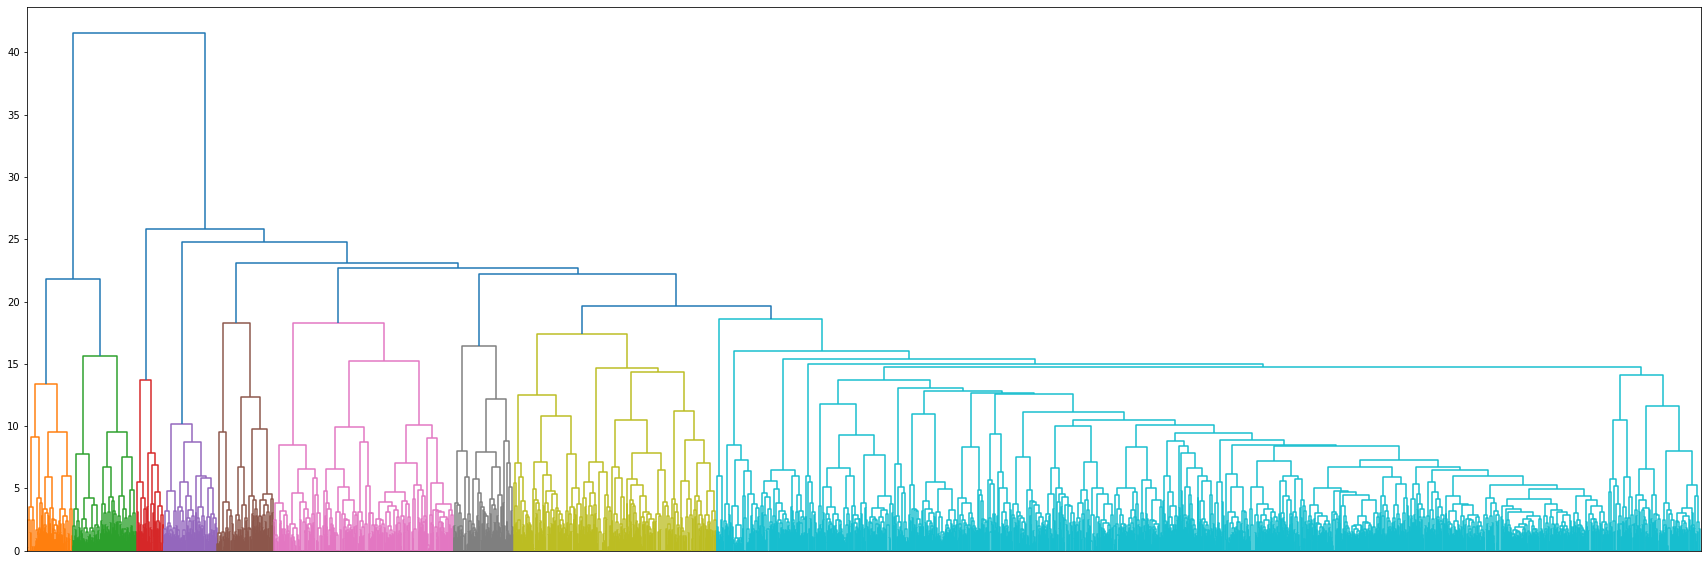

In [4]:
dend_res1 = dendro(0.47)
h_cluster_result_df = pd.DataFrame()
h_cluster_result_df['index']=dend_res1['leaves']
h_cluster_result_df['group_number']=dend_res1['leaves_color_list']
h_cluster_result_df.sort_values('index',inplace=True)
h_cluster_result_df.set_index(h_cluster_result_df['index'],inplace=True)

pd.concat([df,h_cluster_result_df],axis=1).to_csv('./new_order_data/09_bulk_1_h_clustering_result.csv',index=False)

clustered_df = pd.read_csv('./new_order_data/09_bulk_1_h_clustering_result.csv')
clustered_df

clustered_df[clustered_df['conductivity']>0.000001]

In [5]:
clustered_df['group_number'].value_counts()

C9    8857
C8    1826
C6    1616
C2     572
C7     540
C5     514
C4     476
C1     415
C3     247
Name: group_number, dtype: int64

,composition,mpid,conductivity,modified_xrd,index,group_number
14797,Li7P3S11,NaN,0.017000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14797,C1
14794,Li10GeP2S12,NaN,0.012000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14794,C1
14640,AntiPerovskite,NaN,0.001940,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14640,C1
14745,Cu6PS5Br(Cc),NaN,0.001300,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14745,C4
14707,Perovskite-CaTiO3,NaN,0.000900,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14707,C4
14676,Li3P1,NaN,0.000700,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14676,C4
14783,Li7La3Zr2O12,NaN,0.000340,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14783,C1
14790,Li3N1,NaN,0.000300,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14790,C1
14738,Li3P1S4,NaN,0.000160,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14738,C4
14782,Bi2La2Li6O12Sr1,NaN,0.000052,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14782,C1


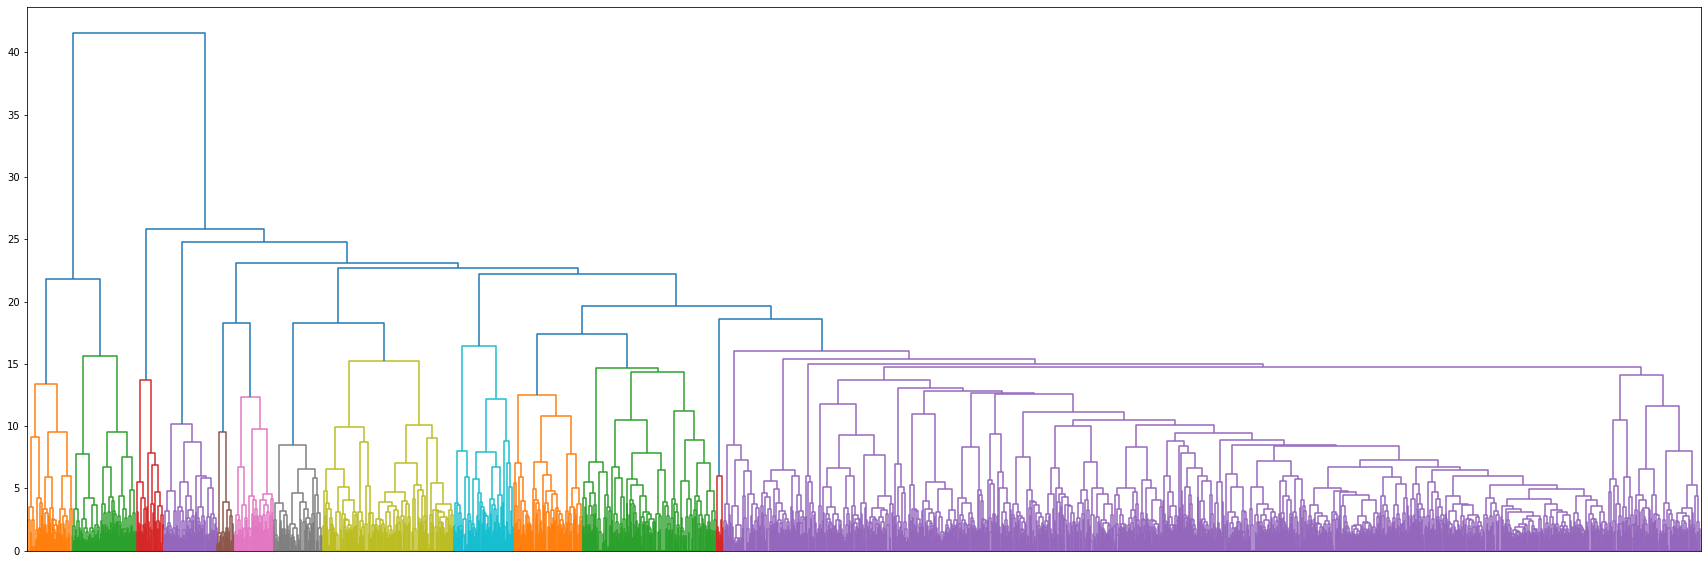

In [6]:
dend_res1 = dendro(0.4)
h_cluster_result_df = pd.DataFrame()
h_cluster_result_df['index']=dend_res1['leaves']
h_cluster_result_df['group_number']=dend_res1['leaves_color_list']
h_cluster_result_df_sorted = h_cluster_result_df.sort_values('index')
# h_cluster_result_df.set_index(h_cluster_result_df['index'],inplace=True)

clustered_df = pd.merge(df,h_cluster_result_df,on='index',how='inner')#.to_csv('./new_order_data/09_bulk_1_h_clustering_result.csv',index=False)

# clustered_df = pd.read_csv('./new_order_data/09_bulk_1_h_clustering_result.csv')
# clustered_df

clustered_df[clustered_df['conductivity']>0.000001].sort_values(by=['conductivity'],ascending=False)

In [62]:
h_cluster_result_df['group_number'] == 'C9'
ll=[]
for i,r  in h_cluster_result_df.iterrows():
    if r['group_number'] == 'C9' or r['group_number'] =='C2':
        ll.append(1)
    else:
        ll.append(0)
h_cluster_result_df['group_9'] = ll        
h_cluster_result_df

,index,group_number,group_9
0,2981,C1,0
1,2941,C1,0
2,2921,C1,0
3,2881,C1,0
4,2861,C1,0
...,...,...,...
15058,10063,C4,0
15059,10058,C4,0
15060,10053,C4,0
15061,10038,C4,0


In [63]:
hr_df = pd.merge(h_cluster_result_df,df,on='index',how='inner')
hr_df.fillna(0)

,index,group_number,group_9,composition,mpid,conductivity,modified_xrd
0,2981,C1,0,Li2Hg1S1O6,mp-754450,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2941,C1,0,Li2Sn1S1O6,mp-754450,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2921,C1,0,Li2In1S1O6,mp-754450,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2881,C1,0,Li2Ge1S1O6,mp-754450,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2861,C1,0,Li2Ga1S1O6,mp-754450,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
15058,10063,C4,0,Li1P1S3F11,mp-850742,0.0,"[7.325409675866535e-169, 6.860900902398288e-16..."
15059,10058,C4,0,Li1Al1S3O11,mp-850742,0.0,"[7.325409675866535e-169, 6.860900902398288e-16..."
15060,10053,C4,0,Li1Mg1S3O11,mp-850742,0.0,"[7.325409675866535e-169, 6.860900902398288e-16..."
15061,10038,C4,0,Li1B1S3O11,mp-850742,0.0,"[7.325409675866535e-169, 6.860900902398288e-16..."


In [79]:
from matplotlib.cm import ScalarMappable


/tmp/ipykernel_398922/252103878.py:17: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


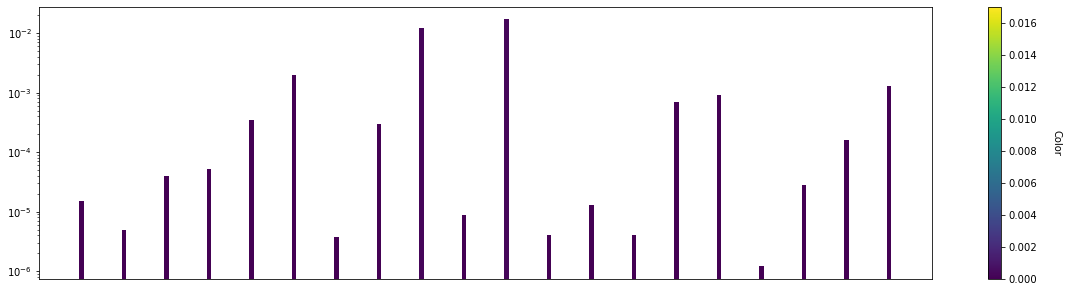

In [92]:
hr_d_test = hr_df[hr_df['conductivity']>0.000001]
plt.figure(figsize=(20,5))

data_color = hr_d_test['conductivity']

my_cmap = plt.cm.get_cmap('viridis') # RdBu GnBu
colors = my_cmap(data_color)

plt.bar(hr_d_test['composition'],hr_d_test['conductivity'],width=0.1,color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_color)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

plt.xticks([])
# plt.yticks([])
plt.yscale('log')

In [85]:
colors

array([[0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96013841, 0.98491349, 0.93342561, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.95730873, 0.98380623, 0.93084198, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529, 0.94117647, 1.        ],
       [0.96862745, 0.98823529,

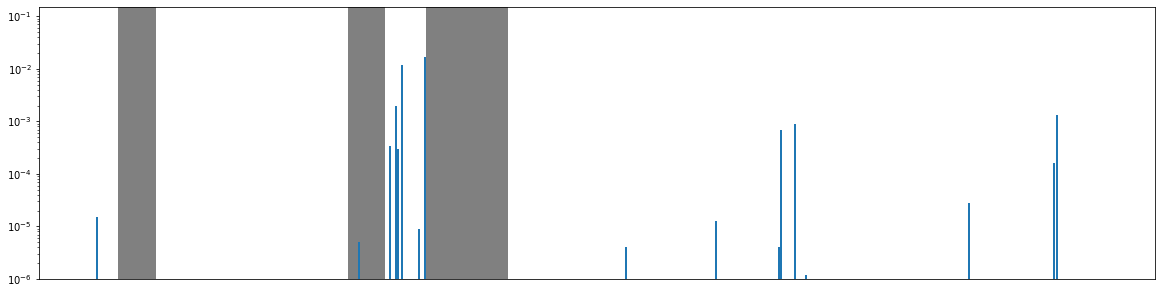

In [64]:
# hr_df = hr_df[hr_df['conductivity']>0.000001]
plt.figure(figsize=(20,5))
plt.bar(hr_df.index,hr_df['group_9'],width=5,color='gray')
plt.bar(hr_df.index,hr_df['conductivity'],width=30)

plt.xticks([])
plt.yticks([])
plt.ylim(1e-6,0.15)
plt.yscale('log')

([], [])

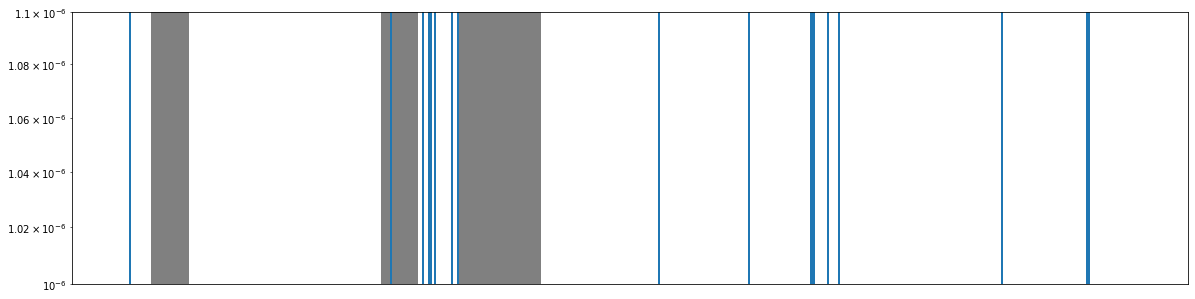

In [73]:
# hr_df = hr_df[hr_df['conductivity']>0.000001]
plt.figure(figsize=(20,5))
plt.bar(hr_df.index,hr_df['group_9'],width=5,color='gray')
plt.bar(hr_df.index,hr_df['conductivity'],width=30)

plt.yscale('log')
plt.ylim(1e-6,1.1e-6)
plt.xticks([])
plt.yticks([])

In [8]:
clustered_df = pd.merge(df,h_cluster_result_df,on='index',how='inner')#.to_csv('./new_order_data/09_bulk_1_h_clustering_result.csv',index=False)

In [9]:
clustered_df[:-528]

,composition,mpid,conductivity,modified_xrd,index,group_number
0,Li1S1O4,mp-1176693,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,C4
1,Li1S1O4,mp-12264,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,C4
2,Li1S1O4,mp-21297,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,C4
3,Li1S1O4,mp-22983,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,C4
4,Li1S1O4,mp-3941,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,C1
...,...,...,...,...,...,...
14530,Na5Li9S7O30,mp-767497,NaN,"[6.927632393822889e-66, 3.404924330446812e-62,...",14530,C2
14531,Li9B7S5O30,mp-767497,NaN,"[3.838036172662641e-66, 1.886390905655796e-62,...",14531,C1
14532,Li9Al7S5O30,mp-767497,NaN,"[3.838036172662641e-66, 1.886390905655796e-62,...",14532,C1
14533,Li9Ga7S5O30,mp-767497,NaN,"[3.838036172662641e-66, 1.886390905655796e-62,...",14533,C1


In [62]:
clustered_df.iloc[3000:-528][clustered_df['group_number']=='C1'].to_csv('./new_order_data/09_h_results.csv',index=False)

/tmp/ipykernel_44018/3090006121.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clustered_df.iloc[3000:-528][clustered_df['group_number']=='C1'].to_csv('./new_order_data/09_h_results.csv',index=False)


In [52]:
clustered_df['group_number'].value_counts()

C4    9268
C2    1777
C8    1176
C1    1036
C9     540
C7     440
C6     353
C3     312
C5     161
Name: group_number, dtype: int64

In [55]:
clustered_df.iloc[3000:-528]['group_number'].value_counts()

C4    7034
C2    1427
C8     940
C1     715
C7     389
C9     376
C6     288
C3     243
C5     123
Name: group_number, dtype: int64

In [54]:
clustered_df[clustered_df['conductivity']>0.000001].sort_values(by=['conductivity'],ascending=False)

,composition,mpid,conductivity,modified_xrd,index,group_number
14797,Li7P3S11,NaN,0.017000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14797,C1
14794,Li10GeP2S12,NaN,0.012000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14794,C1
14640,AntiPerovskite,NaN,0.001940,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14640,C1
14745,Cu6PS5Br(Cc),NaN,0.001300,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14745,C4
14707,Perovskite-CaTiO3,NaN,0.000900,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14707,C4
14676,Li3P1,NaN,0.000700,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14676,C4
14783,Li7La3Zr2O12,NaN,0.000340,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14783,C1
14790,Li3N1,NaN,0.000300,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14790,C1
14738,Li3P1S4,NaN,0.000160,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14738,C4
14782,Bi2La2Li6O12Sr1,NaN,0.000052,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14782,C1


In [24]:
mxrd_df=df.iloc[:,1:2]
mxrd_df['mxrd'] = df['modified_xrd'].apply(literal_eval)
mxrd_df = pd.DataFrame(list(mxrd_df['mxrd']))
new_df = pd.concat([df[['composition','mpid','conductivity']],mxrd_df],axis=1)
new_df

,composition,mpid,conductivity,0,1,2,3,4,5,6,...,890,891,892,893,894,895,896,897,898,899
0,Li1S1O4,mp-1176693,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.735828e-03,3.096566e-03,3.003675e-03,2.323123e-03,1.406861e-03,6.643239e-04,2.443753e-04,7.005130e-05,1.598925e-05,5.429339e-06
1,Li1S1O4,mp-12264,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.889462e-40,2.212332e-43,2.017386e-46,1.432696e-49,7.924017e-53,3.413211e-56,1.145005e-59,2.991423e-63,6.086599e-67,1.928981e-70
2,Li1S1O4,mp-21297,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.009897e-03,1.320878e-03,4.570164e-04,1.244873e-04,2.665600e-05,4.480427e-06,5.903716e-07,6.091290e-08,4.931365e-09,6.201959e-10
3,Li1S1O4,mp-22983,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.065885e-04,9.630296e-04,2.014025e-03,3.317225e-03,4.259098e-03,4.259540e-03,3.320805e-03,2.034164e-03,1.050476e-03,6.992019e-04
4,Li1S1O4,mp-3941,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.172596e-02,7.112156e-03,3.359545e-03,1.235907e-03,3.540934e-04,7.900892e-05,1.372969e-05,1.858163e-06,1.968712e-07,3.215163e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15058,B1Li1O14S4,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.608355e-03,8.524588e-03,8.701365e-03,7.397789e-03,6.199292e-03,6.660056e-03,8.975314e-03,1.196306e-02,1.420625e-02,1.499596e-02
15059,C3F9Li1O9Rb2S3,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.376456e-319,4.241604e-311,5.895920e-303,6.382628e-295,...,2.175063e-03,2.149093e-03,2.839738e-03,3.489320e-03,3.462046e-03,2.692594e-03,1.633151e-03,7.743643e-04,3.018482e-04,1.625690e-04
15060,B7Li3O12,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.962751e-03,3.545774e-03,2.200858e-03,3.068376e-03,5.853213e-03,9.582979e-03,1.249430e-02,1.320752e-02,1.222903e-02,1.153089e-02
15061,B11Li3O18,NaN,NaN,8.166044e-152,3.612767e-146,1.244786e-140,3.340224e-135,6.980444e-130,1.136101e-124,1.440048e-119,...,7.925865e-03,9.648671e-03,9.530782e-03,7.402094e-03,4.486825e-03,2.119134e-03,7.795719e-04,2.234702e-04,5.100731e-05,1.732015e-05


In [35]:
cluster = AgglomerativeClustering(n_clusters=13, affinity='euclidean', linkage='ward')
cluster_results = cluster.fit_predict(new_df.iloc[:,3:])
print(cluster_results[-20:])
pd.DataFrame(cluster_results).value_counts()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


1     8792
2     1205
3     1176
12     621
4      572
0      540
7      476
11     440
8      415
6      353
5      247
10     161
9       65
dtype: int64

In [36]:
cluster_result_df = new_df.iloc[:,:3]
cluster_result_df['cluster_result'] = cluster_results
cluster_result_df[cluster_result_df['conductivity']>0.000001].sort_values(by=['conductivity'],ascending=False)

,composition,mpid,conductivity,cluster_result
14797,Li7P3S11,NaN,0.017000,12
14794,Li10GeP2S12,NaN,0.012000,12
14640,AntiPerovskite,NaN,0.001940,12
14745,Cu6PS5Br(Cc),NaN,0.001300,1
14707,Perovskite-CaTiO3,NaN,0.000900,1
14676,Li3P1,NaN,0.000700,1
14783,Li7La3Zr2O12,NaN,0.000340,12
14790,Li3N1,NaN,0.000300,12
14738,Li3P1S4,NaN,0.000160,1
14782,Bi2La2Li6O12Sr1,NaN,0.000052,12


In [ ]:
cluster_result_df

In [18]:
clustered_df[clustered_df['conductivity']>0.000001].sort_values(by=['conductivity'],ascending=False)

,composition,mpid,conductivity,modified_xrd,index,group_number
14797,Li7P3S11,NaN,0.017000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14797,C1
14794,Li10GeP2S12,NaN,0.012000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14794,C1
14640,AntiPerovskite,NaN,0.001940,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14640,C1
14745,Cu6PS5Br(Cc),NaN,0.001300,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14745,C3
14707,Perovskite-CaTiO3,NaN,0.000900,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14707,C3
14676,Li3P1,NaN,0.000700,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14676,C3
14783,Li7La3Zr2O12,NaN,0.000340,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14783,C1
14790,Li3N1,NaN,0.000300,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14790,C1
14738,Li3P1S4,NaN,0.000160,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14738,C3
14782,Bi2La2Li6O12Sr1,NaN,0.000052,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14782,C1


clustered_df.to_csv('./data/9_1_h_clustering_result.csv',index=True)

In [ ]:
clustered_df[clustered_df['group_number']=='C5']

In [65]:
clustered_df[clustered_df['group_number']=='C5'].to_csv('./data/9_2_h_clustering_c5.csv',index=False)

In [66]:
c5_df = pd.read_csv('./data/9_2_h_clustering_c5.csv')
c5_df.head(3)

,composition,mxrd,mpid,conductivity,modified_xrd,index,group_number
0,Li9S2F21,"[1.3858050923358344e-119, 1.368008181539621e-1...",mp-1100567,NaN,"[1.4594089920579958e-114, 1.121995690211571e-1...",224,C5
1,Li9S2F21,"[0.0, 0.0, 0.0, 0.0, 3.55e-320, 6.336138954307...",mp-1100747,NaN,"[0.0, 0.0, 0.0, 0.0, 4.3285e-320, 7.7244689109...",226,C5
2,Li9S2F21,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7376e-32...",mp-1175393,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.9604e-320, 5....",227,C5


In [105]:
struc_df = pd.read_csv('./data/8_1_mxrd.csv')
struc_df

,sub_comp,mpid,reduced_formula,elements,elements_tuple,composition,roost_band_gap,pretty_formula,structure_poscar,roost_ensemble_mean,e_hull_from_roost,lower_bound,upper_bound,total_range,# of structure,spacegroup,wyckoffs,species,mxrd
0,"['Li', 'S', 'B', 'O', 3.0, 2.0, 3.0, 12.0]",mp-1013749,Li3B3(SO6)2,"['B', 'Li', 'O', 'S']","('B', 'Li', 'O', 'S')",Li3B3S2O12,7.283928,Li3B3(SO6)2,Li12 B12 S8 O48\n1.0\n-6.090052 6.090052 6.090...,-2.422902,0.062948,3.470541,4.634085,1.163544,179,230,1_3_4_8,16_3_5_8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"['Li', 'S', 'B', 'O', 3.0, 2.0, 3.0, 12.0]",mp-759868,Li3B3(SO6)2,"['B', 'Li', 'O', 'S']","('B', 'Li', 'O', 'S')",Li3B3S2O12,7.283928,Li3B3(SO6)2,Li6 B6 S4 O24\n1.0\n2.841333 4.286546 0.000000...,-2.422902,0.062948,3.470541,4.634085,1.163544,179,12,1_3_9_9_9_9_9_9_9_9_9_9_9_9_9_10_10_10,16_16_3_3_3_16_5_5_5_8_8_8_8_8_8_8_8_8,"[2.7149812556300754e-110, 1.625571724323092e-1..."
2,"['Li', 'B', 'S', 'O', 3.0, 3.0, 2.0, 12.0]",mp-774351,Li3B3(SO6)2,"['B', 'Li', 'O', 'S']","('B', 'Li', 'O', 'S')",Li3B3S2O12,7.283928,Li3B3(SO6)2,Li12 B12 S8 O48\n1.0\n9.178733 0.000000 0.0000...,-2.422902,0.062948,3.470541,4.634085,1.163544,179,14,5_5_5_5_5_5_5_5_5_5_5_5_5_5_5_5_5_5_5_5,3_3_3_5_5_5_16_16_8_8_8_8_8_8_8_8_8_8_8_8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"['Li', 'B', 'S', 'O', 3.0, 3.0, 2.0, 12.0]",mp-1211256,Li3B3(SO6)2,"['B', 'Li', 'O', 'S']","('B', 'Li', 'O', 'S')",Li3B3S2O12,7.283928,Li3B3(SO6)2,Li12 B12 S8 O48\n1.0\n-6.301580 6.301580 6.301...,-2.422902,0.062948,3.470541,4.634085,1.163544,179,230,1_3_4_8,16_5_3_8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"['Li', 'S', 'B', 'O', 3.0, 2.0, 3.0, 12.0]",mp-26903,Li3B3(SO6)2,"['B', 'Li', 'O', 'S']","('B', 'Li', 'O', 'S')",Li3B3S2O12,7.283928,Li3B3(SO6)2,Li6 B6 S4 O24\n1.0\n6.281085 5.880498 0.000000...,-2.422902,0.062948,3.470541,4.634085,1.163544,179,15,1_5_5_5_6_6_6_6_6_6_6_6,3_3_3_5_16_5_8_8_8_8_8_8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15363,"['Li', 'Se', 'S', 'O', 1.0, 10.0, 1.0, 24.0]",mp-571132,LiSe10SO24,"['Li', 'O', 'S', 'Se']","('Li', 'O', 'S', 'Se')",Li1Se10S1O24,3.661007,LiSe10SO24,Li1 Se10 S1 O24\n1.0\n8.980104 0.000000 0.0000...,-1.217777,0.081409,4.614974,5.103983,0.489009,1,3,1_1_1_2_2_2_5_5_5_5_5_5_5_5_5_5_5_5_5_5_5,3_34_16_34_34_34_34_34_34_8_8_8_8_8_8_8_8_8_8_8_8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.921..."
15364,"['Li', 'F', 'B', 'S', 1.0, 10.0, 1.0, 24.0]",mp-571132,LiB(S12F5)2,"['B', 'F', 'Li', 'S']","('B', 'F', 'Li', 'S')",Li1B1S24F10,2.535613,LiB(S12F5)2,Li1 B1 S24 F10\n1.0\n8.980104 0.000000 0.00000...,-1.132555,-0.153080,3.709255,4.161454,0.452198,1,3,1_1_1_2_2_2_5_5_5_5_5_5_5_5_5_5_5_5_5_5_5,3_9_5_9_9_9_9_9_9_16_16_16_16_16_16_16_16_16_1...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
15365,"['Li', 'F', 'P', 'S', 1.0, 10.0, 1.0, 24.0]",mp-571132,LiP(S12F5)2,"['F', 'Li', 'P', 'S']","('F', 'Li', 'P', 'S')",Li1P1S24F10,2.838627,LiP(S12F5)2,Li1 P1 S24 F10\n1.0\n8.980104 0.000000 0.00000...,-1.189878,-0.222610,3.709255,4.175974,0.466719,1,3,1_1_1_2_2_2_5_5_5_5_5_5_5_5_5_5_5_5_5_5_5,3_9_15_9_9_9_9_9_9_16_16_16_16_16_16_16_16_16_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
15366,"['Li', 'S', 'F', 'O', 11.0, 8.0, 5.0, 32.0]",mp-769463,Li11S8O32F5,"['F', 'Li', 'O', 'S']","('F', 'Li', 'O', 'S')",Li11S8O32F5,6.427484,Li11S8O32F5,Li11 S8 O32 F5\n1.0\n8.355692 0.000000 0.00000...,-2.041718,0.088667,4.582057,4.651244,0.069188,1,1,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,3_3_3_3_3_3_3_3_3_3_3_16_16_16_16_16_16_16_16_...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [81]:
(struc_df.loc[index]['composition']==c)

False

In [82]:
(struc_df.loc[index]['mpid']==m)

False

In [90]:
struc_df.loc[index]

sub_comp                   ['Li', 'S', 'F', 'F', 3.0, 2.0, 3.0, 12.0]
mpid                                                         mp-26039
reduced_formula                                              Li3S2F15
elements                                             ['F', 'Li', 'S']
elements_tuple                                       ('F', 'Li', 'S')
id                                                               1791
composition                                                  Li3S2F15
roost_band_gap                                               7.312814
pretty_formula                                               Li3S2F15
structure_poscar    Li12 S8 F60\n1.0\n8.681792 0.000000 0.000000\n...
Name: 224, dtype: object

In [87]:
c5_df.iloc[0]

composition                                              Li9S2F21
mxrd            [1.3858050923358344e-119, 1.368008181539621e-1...
mpid                                                   mp-1100567
conductivity                                                  NaN
modified_xrd    [1.4594089920579958e-114, 1.121995690211571e-1...
index                                                         224
group_number                                                   C5
Name: 0, dtype: object

In [98]:
df.iloc[index]

composition                                              Li9S2F21
mxrd            [1.3858050923358344e-119, 1.368008181539621e-1...
mpid                                                   mp-1100567
conductivity                                                  NaN
modified_xrd    [1.4594089920579958e-114, 1.121995690211571e-1...
group_number                                                    5
Name: 224, dtype: object

In [80]:
struc_list = []
error_count = 0
for i in tqdm(range(len(c5_df))):
    index = c5_df['index'][i]
    c = c5_df['composition'][i]
    m = c5_df['mpid'][i]
    select = struc_df[(struc_df.loc[index]['composition']==c) & (struc_df.loc[index]['mpid']==m)]
    
    if len(select) == 1:
        struc_list.append(select['structure_poscar'].values[0])
    else:
        pass
    
    

c5_df['structure'] = struc_list
print(error_count)
c5_df

  0%|          | 0/919 [00:00<?, ?it/s]

KeyError: False

In [69]:
error_count

0

In [42]:
assert len(struc_df[(struc_df['composition']==c) & (struc_df['mpid']==m)]) == 1, 'not 1'

In [91]:
mxrd_df=df.iloc[:,1:2]
mxrd_df['mxrd'] = df['modified_xrd'].apply(literal_eval)
mxrd_df = pd.DataFrame(list(mxrd_df['mxrd']))
new_df = pd.concat([df[['composition','mpid','conductivity']],mxrd_df],axis=1)
new_df

,composition,mpid,conductivity,0,1,2,3,4,5,6,...,890,891,892,893,894,895,896,897,898,899
0,Li3B3S2O12,mp-1013749,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000190,0.000042,0.000007,9.975816e-07,1.051443e-07,8.630772e-09,5.517468e-10,2.746987e-11,1.065878e-12,6.432779e-14
1,Li3B3S2O12,mp-759868,NaN,1.852317e-105,8.637401e-101,3.136735e-96,8.871553e-92,1.954109e-87,3.352167e-83,4.478477e-79,...,0.008893,0.008893,0.006926,4.200555e-03,1.984202e-03,7.299470e-04,2.091339e-04,4.667345e-05,8.224647e-06,2.194862e-06
2,Li3B3S2O12,mp-774351,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.004004,0.003136,0.003787,5.427778e-03,6.787253e-03,6.756331e-03,5.263056e-03,3.223435e-03,1.664595e-03,1.107958e-03
3,Li3B3S2O12,mp-1211256,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000128,0.000029,0.000005,6.707352e-07,7.069497e-08,5.802996e-09,3.709731e-10,1.846967e-11,7.166552e-13,4.325151e-14
4,Li3B3S2O12,mp-26903,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.004139,0.005314,0.005314,4.138646e-03,2.510216e-03,1.185742e-03,4.362158e-04,1.250454e-04,2.854179e-05,9.691713e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15891,B1Li1O14S4,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.006608,0.008525,0.008701,7.397789e-03,6.199292e-03,6.660056e-03,8.975314e-03,1.196306e-02,1.420625e-02,1.499596e-02
15892,C3F9Li1O9Rb2S3,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.376456e-319,4.241604e-311,5.895920e-303,6.382628e-295,...,0.002175,0.002149,0.002840,3.489320e-03,3.462046e-03,2.692594e-03,1.633151e-03,7.743643e-04,3.018482e-04,1.625690e-04
15893,B7Li3O12,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.006963,0.003546,0.002201,3.068376e-03,5.853213e-03,9.582979e-03,1.249430e-02,1.320752e-02,1.222903e-02,1.153089e-02
15894,B11Li3O18,NaN,NaN,8.166044e-152,3.612767e-146,1.244786e-140,3.340224e-135,6.980444e-130,1.136101e-124,1.440048e-119,...,0.007926,0.009649,0.009531,7.402094e-03,4.486825e-03,2.119134e-03,7.795719e-04,2.234702e-04,5.100731e-05,1.732015e-05


In [92]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster_results = cluster.fit_predict(new_df.iloc[:,3:])
print(cluster_results[-20:])
pd.DataFrame(cluster_results).value_counts()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0    11836
5      919
1      849
6      829
2      714
4      555
3      194
dtype: int64

In [93]:
cluster_results

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
df['group_number'] = cluster_results
df

,composition,mxrd,mpid,conductivity,modified_xrd,group_number
0,Li3B3S2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1013749,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,Li3B3S2O12,"[2.7149812556300754e-110, 1.625571724323092e-1...",mp-759868,NaN,"[1.8523171496143797e-105, 8.63740110969654e-10...",0
2,Li3B3S2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-774351,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,Li3B3S2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1211256,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,Li3B3S2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-26903,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...,...,...
15891,B1Li1O14S4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
15892,C3F9Li1O9Rb2S3,"[0.0, 0.0, 1.92979e-318, 2.4723075750492e-310,...",NaN,NaN,"[0.0, 0.0, 0.0, 2.37646e-319, 4.2416036310525e...",0
15893,B7Li3O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
15894,B11Li3O18,"[6.051556561682696e-169, 1.3000318180921978e-1...",NaN,NaN,"[8.166043937748837e-152, 3.612767197784627e-14...",0


In [97]:
df[df['group_number'] == 5]

,composition,mxrd,mpid,conductivity,modified_xrd,group_number
224,Li9S2F21,"[1.3858050923358344e-119, 1.368008181539621e-1...",mp-1100567,NaN,"[1.4594089920579958e-114, 1.121995690211571e-1...",5
226,Li9S2F21,"[0.0, 0.0, 0.0, 0.0, 3.55e-320, 6.336138954307...",mp-1100747,NaN,"[0.0, 0.0, 0.0, 0.0, 4.3285e-320, 7.7244689109...",5
227,Li9S2F21,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7376e-32...",mp-1175393,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.9604e-320, 5....",5
228,Li9S2F21,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.997...",mp-1175510,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8527e-32...",5
230,Li9S2F21,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1175801,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
...,...,...,...,...,...,...
15702,I2Li5S3Sb1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
15738,Cl5Cs2Li3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
15780,F1Li1O3S1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
15781,Ca3Li1N5Si2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5


In [120]:
((struc_df['composition']==c) & (struc_df['mpid']==m)).value_counts()

False    15367
True         1
dtype: int64

In [109]:
struc_list = []
error_count = 0
c5_df = df[df['group_number'] == 5]
for i in tqdm(range(len(c5_df))):
    index = c5_df['index'][i]
    c = c5_df['composition'][i]
    m = c5_df['mpid'][i]
    x = c5_df['modified_xrd'][i]
    select = struc_df[(struc_df['composition']==c) & (struc_df['mpid']==m)]
    
    if len(select) == 1:
        struc_list.append(select['structure_poscar'].values[0])
    else:
        select['modified_xrd'] == 
        struc_list.append(select['structure_poscar'].values[0])
    
    

c5_df['structure'] = struc_list
print(error_count)
c5_df

  0%|          | 0/919 [00:00<?, ?it/s]

KeyError: 'index'

In [135]:
c5_dfdf = c5_df[c5_df['mpid'].notnull()]

In [137]:
c5_struc_df = struc_df.loc[c5_dfdf.index]

In [142]:
(c5_dfdf['mpid'] == c5_struc_df['mpid']).value_counts()

True    887
Name: mpid, dtype: int64

In [143]:
c5_struc_df

,sub_comp,mpid,reduced_formula,elements,elements_tuple,composition,roost_band_gap,pretty_formula,structure_poscar,roost_ensemble_mean,e_hull_from_roost,lower_bound,upper_bound,total_range,# of structure,spacegroup,wyckoffs,species,mxrd
224,"['Li', 'S', 'F', 'F', 9.0, 2.0, 5.0, 16.0]",mp-1100567,Li9S2F21,"['F', 'Li', 'S']","('F', 'Li', 'S')",Li9S2F21,6.991746,Li9S2F21,Li9 S2 F21\n1.0\n2.885781 0.000000 0.000000\n0...,-2.716685,0.016703,3.956802,6.331889,2.375087,717,6,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_2_2_2_2_2_2_2_...,3_3_3_3_16_9_9_9_9_9_9_9_9_9_9_9_3_3_3_3_3_16_...,"[1.3858050923358344e-119, 1.368008181539621e-1..."
226,"['Li', 'S', 'F', 'F', 9.0, 2.0, 5.0, 16.0]",mp-1100747,Li9S2F21,"['F', 'Li', 'S']","('F', 'Li', 'S')",Li9S2F21,6.991746,Li9S2F21,Li9 S2 F21\n1.0\n1.457365 10.573549 0.000000\n...,-2.716685,0.016703,3.956802,6.331889,2.375087,717,12,1_4_9_9_9_9_9_9_9_9_9_9_9_9_9_9_9,3_9_3_3_3_3_16_9_9_9_9_9_9_9_9_9_9,"[0.0, 0.0, 0.0, 0.0, 3.55e-320, 6.336138954307..."
227,"['Li', 'S', 'F', 'F', 9.0, 2.0, 5.0, 16.0]",mp-1175393,Li9S2F21,"['F', 'Li', 'S']","('F', 'Li', 'S')",Li9S2F21,6.991746,Li9S2F21,Li9 S2 F21\n1.0\n5.821189 0.000000 0.000000\n2...,-2.716685,0.016703,3.956802,6.331889,2.375087,717,2,1_2_3_7_9_9_9_9_9_9_9_9_9_9_9_9_9_9,16_16_3_9_3_3_3_3_9_9_9_9_9_9_9_9_9_9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7376e-32..."
228,"['Li', 'S', 'F', 'F', 9.0, 2.0, 5.0, 16.0]",mp-1175510,Li9S2F21,"['F', 'Li', 'S']","('F', 'Li', 'S')",Li9S2F21,6.991746,Li9S2F21,Li9 S2 F21\n1.0\n5.210760 -0.019657 -2.787926\...,-2.716685,0.016703,3.956802,6.331889,2.375087,717,2,1_2_3_4_5_6_7_8_9_9_9_9_9_9_9_9_9_9_9_9,3_3_3_3_3_9_9_9_3_3_16_9_9_9_9_9_9_9_9_9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.997..."
230,"['Li', 'S', 'F', 'F', 9.0, 2.0, 5.0, 16.0]",mp-1175801,Li9S2F21,"['F', 'Li', 'S']","('F', 'Li', 'S')",Li9S2F21,6.991746,Li9S2F21,Li9 S2 F21\n1.0\n5.861216 0.000000 0.000000\n0...,-2.716685,0.016703,3.956802,6.331889,2.375087,717,2,1_2_3_7_9_9_9_9_9_9_9_9_9_9_9_9_9_9,3_3_3_9_3_3_3_16_9_9_9_9_9_9_9_9_9_9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15080,"['Cl', 'Li', 'S', 'O', 4.0, 4.0, 19.0, 44.0]",mp-762032,Li4S19(ClO11)4,"['Cl', 'Li', 'O', 'S']","('Cl', 'Li', 'O', 'S')",Li4S19Cl4O44,5.283547,Li4S19(ClO11)4,Li4 S19 Cl4 O44\n1.0\n5.882363 0.000000 0.0000...,-1.674358,0.123509,3.940206,4.347158,0.406952,2,1,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,17_17_17_17_3_3_3_3_16_16_16_16_16_16_16_16_16...,"[2.319111735470866e-176, 2.7889737085336385e-1..."
15081,"['I', 'Li', 'S', 'O', 4.0, 4.0, 19.0, 44.0]",mp-762032,Li4S19(IO11)4,"['I', 'Li', 'O', 'S']","('I', 'Li', 'O', 'S')",Li4S19I4O44,2.370706,Li4S19(IO11)4,Li4 S19 I4 O44\n1.0\n5.882363 0.000000 0.00000...,-1.578958,0.169917,3.495867,4.347158,0.851291,2,1,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,53_53_53_53_3_3_3_3_16_16_16_16_16_16_16_16_16...,"[2.319111735470866e-176, 2.7889737085336385e-1..."
15361,"['Li', 'Si', 'S', 'O', 1.0, 10.0, 1.0, 24.0]",mp-571132,LiSi10SO24,"['Li', 'O', 'S', 'Si']","('Li', 'O', 'S', 'Si')",Li1Si10S1O24,6.803209,LiSi10SO24,Li1 Si10 S1 O24\n1.0\n8.980104 0.000000 0.0000...,-2.891819,0.165041,4.651244,5.218772,0.567527,1,3,1_1_1_2_2_2_5_5_5_5_5_5_5_5_5_5_5_5_5_5_5,3_14_16_14_14_14_14_14_14_8_8_8_8_8_8_8_8_8_8_8_8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
15362,"['Li', 'Ge', 'S', 'O', 1.0, 10.0, 1.0, 24.0]",mp-571132,LiGe10SO24,"['Ge', 'Li', 'O', 'S']","('Ge', 'Li', 'O', 'S')",Li1Ge10S1O24,4.737280,LiGe10SO24,Li1 Ge10 S1 O24\n1.0\n8.980104 0.000000 0.0000...,-1.984989,0.080116,4.651244,4.952268,0.301024,1,3,1_1_1_2_2_2_5_5_5_5_5_5_5_5_5_5_5_5_5_5_5,3_32_16_32_32_32_32_32_32_8_8_8_8_8_8_8_8_8_8_8_8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [144]:
c5_struc_df.to_csv('./data/9_3_h_clustering_c5_with_structure.csv')

[Text(5, 0, ''),
 Text(15, 0, ''),
 Text(25, 0, ''),
 Text(35, 0, ''),
 Text(45, 0, ''),
 Text(55, 0, ''),
 Text(65, 0, ''),
 Text(75, 0, ''),
 Text(85, 0, ''),
 Text(95, 0, ''),
 Text(105, 0, ''),
 Text(115, 0, ''),
 Text(125, 0, ''),
 Text(135, 0, ''),
 Text(145, 0, ''),
 Text(155, 0, ''),
 Text(165, 0, ''),
 Text(175, 0, ''),
 Text(185, 0, ''),
 Text(195, 0, ''),
 Text(205, 0, ''),
 Text(215, 0, ''),
 Text(225, 0, ''),
 Text(235, 0, ''),
 Text(245, 0, ''),
 Text(255, 0, ''),
 Text(265, 0, ''),
 Text(275, 0, ''),
 Text(285, 0, ''),
 Text(295, 0, ''),
 Text(305, 0, ''),
 Text(315, 0, ''),
 Text(325, 0, ''),
 Text(335, 0, ''),
 Text(345, 0, ''),
 Text(355, 0, ''),
 Text(365, 0, ''),
 Text(375, 0, ''),
 Text(385, 0, ''),
 Text(395, 0, ''),
 Text(405, 0, ''),
 Text(415, 0, ''),
 Text(425, 0, ''),
 Text(435, 0, ''),
 Text(445, 0, ''),
 Text(455, 0, ''),
 Text(465, 0, ''),
 Text(475, 0, ''),
 Text(485, 0, ''),
 Text(495, 0, ''),
 Text(505, 0, ''),
 Text(515, 0, ''),
 Text(525, 0, ''),
 Tex

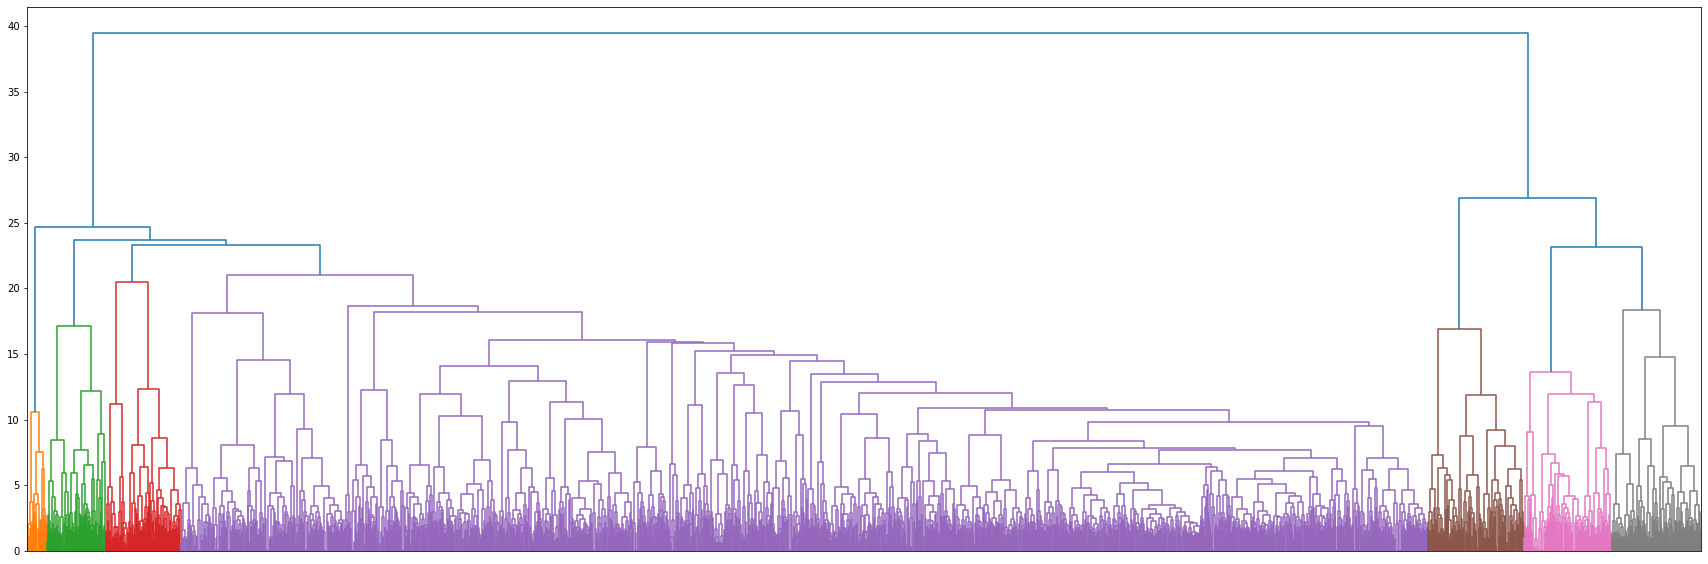

In [6]:
fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(1,1,1)
dend1 = sch.linkage(flight2, method='ward')
cutoff = 0.55*max(dend1[:,2])
dend_res1 = sch.dendrogram(dend1, color_threshold=cutoff)
ax1.set_xticklabels([])

In [7]:
h_cluster_result_df = pd.DataFrame()
h_cluster_result_df['index']=dend_res1['leaves']
h_cluster_result_df['group_number']=dend_res1['leaves_color_list']
h_cluster_result_df.sort_values('index',inplace=True)
h_cluster_result_df.set_index(h_cluster_result_df['index'],inplace=True)

pd.concat([df,h_cluster_result_df],axis=1).to_csv('./data/9_1_h_clustering_result.csv',index=False)

clustered_df = pd.read_csv('./data/9_1_h_clustering_result.csv')
clustered_df

clustered_df[clustered_df['conductivity']>0.000001]

,composition,mxrd,mpid,conductivity,modified_xrd,index,group_number
15398,Li2S3Sn1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000015,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15398,C6
15469,Li2O4Si1Zn1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000005,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15469,C2
15473,AntiPerovskite,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.001940,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15473,C5
15475,I3Li6N1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000004,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15475,C5
15477,Li3.333Mg0.333P2S6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000004,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15477,C4
15509,Li3P1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000700,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15509,C4
15540,Perovskite-CaTiO3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000900,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15540,C3
15571,Li3P1S4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000160,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15571,C4
15578,Cu6PS5Br(Cc),"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.001300,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15578,C4
15580,Cl2Li5N1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15580,C4


In [8]:
clustered_df[clustered_df['conductivity']>0.000001].sort_values(by='conductivity',ascending=False)

,composition,mxrd,mpid,conductivity,modified_xrd,index,group_number
15630,Li7P3S11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.017000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15630,C5
15627,Li10GeP2S12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.012000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15627,C5
15473,AntiPerovskite,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.001940,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15473,C5
15578,Cu6PS5Br(Cc),"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.001300,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15578,C4
15540,Perovskite-CaTiO3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000900,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15540,C3
15509,Li3P1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000700,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15509,C4
15616,Li7La3Zr2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000340,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15616,C4
15623,Li3N1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000300,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15623,C5
15571,Li3P1S4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000160,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15571,C4
15615,Bi2La2Li6O12Sr1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000052,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15615,C4


In [9]:
clustered_df

,composition,mxrd,mpid,conductivity,modified_xrd,index,group_number
0,Li3B3S2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1013749,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,C4
1,Li3B3S2O12,"[2.7149812556300754e-110, 1.625571724323092e-1...",mp-759868,NaN,"[1.8523171496143797e-105, 8.63740110969654e-10...",1,C4
2,Li3B3S2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-774351,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,C4
3,Li3B3S2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1211256,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,C4
4,Li3B3S2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-26903,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,C4
...,...,...,...,...,...,...,...
15891,B1Li1O14S4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15891,C4
15892,C3F9Li1O9Rb2S3,"[0.0, 0.0, 1.92979e-318, 2.4723075750492e-310,...",NaN,NaN,"[0.0, 0.0, 0.0, 2.37646e-319, 4.2416036310525e...",15892,C4
15893,B7Li3O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15893,C4
15894,B11Li3O18,"[6.051556561682696e-169, 1.3000318180921978e-1...",NaN,NaN,"[8.166043937748837e-152, 3.612767197784627e-14...",15894,C4


In [10]:
test_df = pd.DataFrame()
test_df['index']=dend_res1['leaves']
test_df

,index
0,5570
1,5469
2,5419
3,5368
4,5317
...,...
15891,10838
15892,10826
15893,10802
15894,3038


In [3]:
mxrd_df=df.iloc[:,1:2]
mxrd_df['mxrd'] = df['modified_xrd'].apply(literal_eval)
mxrd_df = pd.DataFrame(list(mxrd_df['mxrd']))
new_df = pd.concat([df[['composition','mpid','conductivity']],mxrd_df],axis=1)
new_df

,composition,mpid,conductivity,0,1,2,3,4,5,6,...,890,891,892,893,894,895,896,897,898,899
0,Li3B3S2O12,mp-1013749,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000190,0.000042,0.000007,9.975816e-07,1.051443e-07,8.630772e-09,5.517468e-10,2.746987e-11,1.065878e-12,6.432779e-14
1,Li3B3S2O12,mp-759868,NaN,1.852317e-105,8.637401e-101,3.136735e-96,8.871553e-92,1.954109e-87,3.352167e-83,4.478477e-79,...,0.008893,0.008893,0.006926,4.200555e-03,1.984202e-03,7.299470e-04,2.091339e-04,4.667345e-05,8.224647e-06,2.194862e-06
2,Li3B3S2O12,mp-774351,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.004004,0.003136,0.003787,5.427778e-03,6.787253e-03,6.756331e-03,5.263056e-03,3.223435e-03,1.664595e-03,1.107958e-03
3,Li3B3S2O12,mp-1211256,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000128,0.000029,0.000005,6.707352e-07,7.069497e-08,5.802996e-09,3.709731e-10,1.846967e-11,7.166552e-13,4.325151e-14
4,Li3B3S2O12,mp-26903,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.004139,0.005314,0.005314,4.138646e-03,2.510216e-03,1.185742e-03,4.362158e-04,1.250454e-04,2.854179e-05,9.691713e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15891,B1Li1O14S4,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.006608,0.008525,0.008701,7.397789e-03,6.199292e-03,6.660056e-03,8.975314e-03,1.196306e-02,1.420625e-02,1.499596e-02
15892,C3F9Li1O9Rb2S3,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.376456e-319,4.241604e-311,5.895920e-303,6.382628e-295,...,0.002175,0.002149,0.002840,3.489320e-03,3.462046e-03,2.692594e-03,1.633151e-03,7.743643e-04,3.018482e-04,1.625690e-04
15893,B7Li3O12,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.006963,0.003546,0.002201,3.068376e-03,5.853213e-03,9.582979e-03,1.249430e-02,1.320752e-02,1.222903e-02,1.153089e-02
15894,B11Li3O18,NaN,NaN,8.166044e-152,3.612767e-146,1.244786e-140,3.340224e-135,6.980444e-130,1.136101e-124,1.440048e-119,...,0.007926,0.009649,0.009531,7.402094e-03,4.486825e-03,2.119134e-03,7.795719e-04,2.234702e-04,5.100731e-05,1.732015e-05


In [4]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster_results = cluster.fit_predict(new_df.iloc[:,3:])
print(cluster_results[-20:])
pd.DataFrame(cluster_results).value_counts()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0    11836
5      919
1      849
6      829
2      714
4      555
3      194
dtype: int64

In [15]:
test_df = df.iloc[:,:4]
test_df['cluster_number'] = cluster_results
test_df.sort_values(by='conductivity',ascending=False)[:10]

,composition,mxrd,mpid,conductivity,cluster_number
15630,Li7P3S11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.017000,5
15627,Li10GeP2S12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.012000,5
15473,AntiPerovskite,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.001940,5
15578,Cu6PS5Br(Cc),"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.001300,0
15540,Perovskite-CaTiO3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000900,2
15509,Li3P1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000700,0
15616,Li7La3Zr2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000340,0
15623,Li3N1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000300,5
15571,Li3P1S4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000160,0
15615,Bi2La2Li6O12Sr1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000052,0


In [16]:
test_df.sort_values(by='conductivity',ascending=False)[:10]['cluster_number'].value_counts()

0    5
5    4
2    1
Name: cluster_number, dtype: int64

In [17]:
test_df = df.iloc[:,:4]
test_df['cluster_number'] = cluster_results
test_df.sort_values(by='conductivity',ascending=False)[:20]

,composition,mxrd,mpid,conductivity,cluster_number
15630,Li7P3S11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.017000,5
15627,Li10GeP2S12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.012000,5
15473,AntiPerovskite,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.001940,5
15578,Cu6PS5Br(Cc),"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.001300,0
15540,Perovskite-CaTiO3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000900,2
15509,Li3P1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000700,0
15616,Li7La3Zr2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000340,0
15623,Li3N1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000300,5
15571,Li3P1S4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000160,0
15615,Bi2La2Li6O12Sr1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000052,0


In [18]:
test_df.sort_values(by='conductivity',ascending=False)[:20]['cluster_number'].value_counts()

0    11
5     6
2     1
6     1
4     1
Name: cluster_number, dtype: int64